# Exploratory Data Analysis (EDA)

### Contents

1. Goal
2. Approach
3. Data Loading
4. Data Cleaning
    - Dealing with data types
    - Handling missing data
5. Data Exploration
    - Outlier detection
    - Ploting distribution
6. Feature Engineering
    - Interaction between features
    - Dimensionality reduction using PCA
7. Feature Selection and Model Building
    - Show model performance on datasets which have been preprocessed and those which are not preprocessed

### 1. Goal

* Build a binary classficiation model to predict whether income of Adult Data Set - https://archive-beta.ics.uci.edu/ml/datasets/adult exceeds `$50K/yr` based on census data. (Cite: Adult. (1996). UCI Machine Learning Repository)

* Explore effective pre-modeling steps

* Compare the model performance with and without 
    * data preprocessing
    * data cleaning
    * feature exploration
    * feature engineering
* The adult.data file has been edited to add the header

### 2. Approach

- **Terminology**
    - Input: Independant variables / features / Predictors
    - Output: Dependant variables / targer variable / Prediction
    - Model: It explains the effect that features have on the target variable 

- **Model Building**
    - Split the data randomly into train/test sets
    - Build model on the train set and assess the performance on test set
    - Check performance metrics 
        - AUC or ROC
            - True Positive Rate (TPR)
            - False Positive Rate (FPR)

- **Classifiction Model Types**
    - Logistic Regression
    - Decision Trees
        - Random Forest
        - Gradient Boosted Trees
    - Support Vector Machines
    - Tandem models (combination of multiple models)
    - and so on...

I am going to use Logistic Regression for this experiment.

### 3. Data Loading

In [85]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm.notebook import tnrange

df = pd.read_csv('./data/adult.data')
df = df.replace({"^\s*|\s*$":""}, regex=True) 
df = df.replace('?', np.nan)

In [86]:
df.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Observation**
- There are total 16 columns having combination of numerical and categorical variables / features.

In [87]:
# Let's take a look at the data types of these features
# df.info()

In [88]:
# Have a look at the target variable `income`
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

**Observation**
- The target variable `income` contains two values.
- Let's simplify the values and convert them to 1 and 0

In [89]:
# for x in df['income']:
#     print(x)

In [90]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
df['income'] = [0 if x.strip() == '<=50K' else 1 for x in df['income']]

# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('income', 1)
y = df.income

In [91]:
X.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [92]:
print(y.value_counts())

0    24720
1     7841
Name: income, dtype: int64


### 4. Data Cleaning

**A. Dealing with data types**
- There are three main data types:
    - Numeric: e.g. income, age
    - Categorical: e.g. sex, education
    - Ordinal: e.g. low/medium/high

- Since machine learning can handle only numerica features we must convert categorical and ordinal fetures into numeric features
    - Create dummry features
    - Transform a categorical feature into a set of dummy features, each representing a unique category
    - In the set of dummy features, 1 indicates that the observation belongs to that category

In [93]:
# Education is a categorical feature
X['education'].head(5)

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object

In [94]:
# Use get_dummies in pandas
# Another option is OneHotEncoder in sci-kit learn
pd.get_dummies(X['education']).head(5)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


It isn't always beneficial to convert all categorical variables into numerical variables because it may increase the sparsity of the data if categorical variables are in large number. So, it's a good idea to select few categorical variables.

In [95]:
X['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [96]:
# Decide which categorical variables you want to use in model

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print(f"Feature '{col_name}' has {unique_cat} unique categories")


Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native_country' has 42 unique categories


In [97]:
# Although, 'native_country' has a lot of unique categories, most categories only have a few observations
print(X['native_country'].value_counts().sort_values(ascending=False).head(10))

United-States    29170
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Cuba                95
England             90
Name: native_country, dtype: int64


In [98]:
# In this case, bucket the low frequency categories as "Other"

X['native_country'] = ['United-States' if x == 'United-States' else 'Other' for x in X['native_country']]
X['native_country'].value_counts().sort_values(ascending=False)

United-States    29170
Other             3391
Name: native_country, dtype: int64

In [99]:
# Create a list of features to dummy
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [100]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df


In [101]:
X = dummy_df(X, todummy_list)

In [102]:
X.head(30)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
5,37,284582,14,0,0,40,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
6,49,160187,5,0,0,16,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
8,31,45781,14,14084,0,50,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
9,42,159449,13,5178,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


**B. Handling Missing Data**

- Models cannot handle missing data
- A simple solution is to remove observations/features that have missing data
- But removing missing data can introduce a lot of issues
    - If the feature having randomly missing data is removed, we may potentially lose a lot of data
    - In addition to losing the data, we may introduce a potential bias
    - Usually this is poor solution
- An alternative is to use imputation
    - Replace missing value with another value
    - Strategyes: mean, media, highest frequency value of given feature

In [126]:
# Chech how much of the data is missing
X.isnull().sum().sort_values(ascending=False).head()


age                         0
occupation_Tech-support     0
marital_status_Separated    0
marital_status_Widowed      0
occupation_Adm-clerical     0
dtype: int64

We don't have any features having nall values because the columns with NaN value were not considered during dummy feature transformation. Check this out.

In [129]:
X.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital_status_Divorced', 'marital_status_Married-AF-spouse',
       'marital_status_Married-civ-spouse',
       'marital_status_Married-spouse-absent', 'marital_status_Never-married',
       'marital_status_Separated', 'marital_status_Widowed',
       'occupation_Adm-clerical', 'occupation_Arme

### 5. Data Exploration / Exploratory Data Analysis

- A large part of the data preprocessing and modeling workflow can be generalised and automated but understanding the problem, domain, and data is extremely important for building high performing models.
- The following section covers some techniques for exploring the data to make smarter decisions.

**A. Outlier Detection**

- An outlier is an observation that deviates drastically from other observations in a dataset


- Examples:
    - Naural, e.g. Warren Buffett's income
    - Error, e.g. person age is 1000 due to mistyping extra 0
    
    
- Why are outliers problematic?
    - Naturally occuring:
        - Not necessarily problematic
        - But can skew the model by affecting the slop (see the figures below)
    - Error:
        - Indicateive of data quality issue
        - Treat in the same way as a missing value, i.e. use imputation
        
        
- Many other approaches for detecting outliers
    - Tukey IQR
    - Kernel Density Estimation

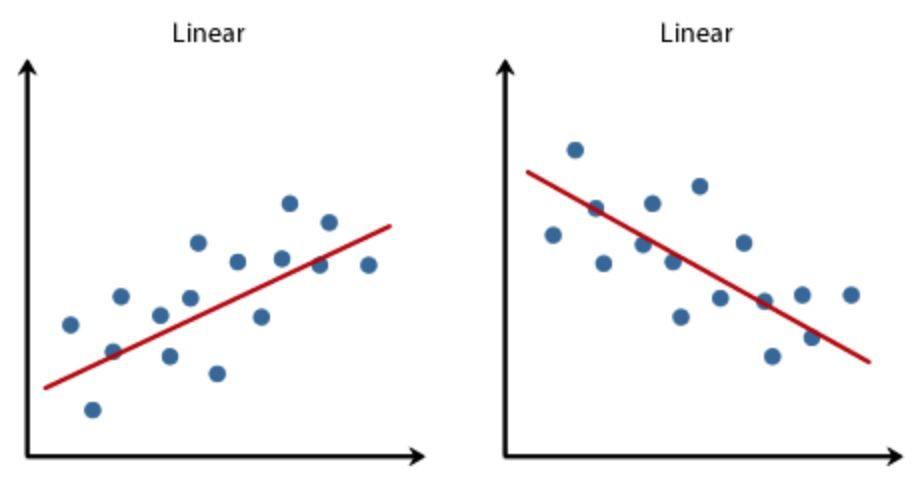

In [145]:
# These images illustrate the linear relatioship of the independant variables and outliers
# Images taken from: https://statistics.laerd.com/spss-tutorials/linear-regression-using-spss-statistics.php
from IPython.display import Image
Image(filename='./images/linear.png', width = 500)


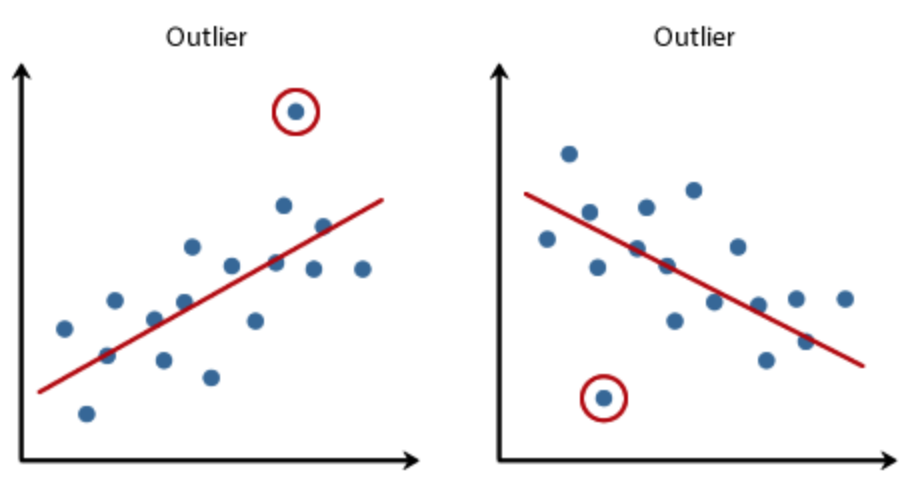

In [146]:
Image(filename='./images/linear-outlier.png', width = 500)

### Outlier detection - Tukey IQR
- Identifies extreme values in data


- Outliers are defined as:
    - Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)
 
 
- Standard deviation from the mean is another common method to detect extreme values
    - But it can be problematic:
        - Assumes normality 
        - Sensitive to very extreme values

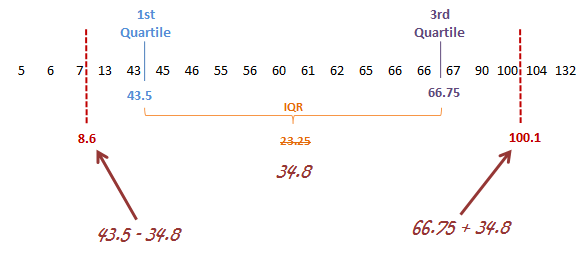

In [151]:
# Image take from : https://cxl.com/blog/outliers/
Image(filename='./images/iqr.png')

In [149]:
def find_tukeyiqr_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [153]:
# Let's take an age to find the outliers. Here people falling between age 75 to 90 are outliers here
tukey_indeces, tukey_values = find_tukeyiqr_outliers(X['age'])
print(np.sort(tukey_values))

[79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 79 80 80
 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 81 81 81 81
 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 82 82 82 82 82 82 82 82
 82 82 82 82 83 83 83 83 83 83 84 84 84 84 84 84 84 84 84 84 85 85 85 86
 87 88 88 88 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90
 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90]


### Outlier detection - Kernerl Density Estimation
- Non-parametric way to estimate the probability density function of a given feature
- Can be advantageous compared to extreme value detection (e.g. Tukey IQR)
    - Capture outliers in bimodal distribution

In [156]:
# This function takes a little longer compared to Tukey IQR based approach
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_kde_outliers(x):
    x_scaled = scale(list(map(float, x))) 
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outler_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outler_value

In [157]:
import time
st = time.time()
kde_indices, kde_values = find_kde_outliers(X['age'])
print(np.sort(kde_values))
print(f'Execution time = {round((time.time() - st)/60, 2)} mins.')

[69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69 69
 69 69 69 69 69 69 69 69 69 69 69 69 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72
 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72
 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72

The outliers are found from age range 69 to 90 with the help of `Kernel Density Estimation` base approach